In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [5]:
# set db path hackily
data._get_connection("../../data/participants.db")

EXPERIMENT_ID = "07_comprehension_spray-load-construction-meaning-with-images"

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-slider-response-with-copout")]
image_response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-image-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.
Missing datastring for uid A29RCIFHRAZ797:33C7UALJVMMIYSGY45UODLGQ11O18G. Status was 1.


In [6]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

print(f"Dropping {image_response_df.index.duplicated().sum()} dupe results.")
image_response_df = image_response_df[~image_response_df.index.duplicated()]

Dropping 0 dupe results.
Dropping 0 dupe results.


In [7]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

image_response_df = pd.concat([image_response_df,
                               image_response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                              axis=1) \
    .drop(columns="condition_id")

In [8]:
for df in [response_df, image_response_df]:
    # Convert condition_id to independent features
    df["theme_is_object"] = df["condition_0"] == 1
    df["location_is_heavy"] = df["condition_1"] == 1
    df["theme_is_heavy"] = df["condition_2"] == 1
    
    # dtype fixes
    df["dateTime"] = pd.to_datetime(df.dateTime, unit="ms")

In [9]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

response_df["slider_copout"] = response_df.slider_copout.astype(bool)

In [10]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,slider_copout,response,image_copout,condition_0,condition_1,condition_2,theme_is_object,location_is_heavy,theme_is_heavy,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
5,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,6765.0,0.0-5.0,2021-10-08 16:44:29.463,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,practice,fill,full,False,False,False,NaN
6,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5431.7,0.0-6.0,2021-10-08 16:44:34.898,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,practice,cover,empty,False,False,False,NaN
8,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5877.4,0.0-8.0,2021-10-08 16:44:42.887,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,practice,cover,full,False,False,False,NaN
11,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5444.6,0.0-11.0,2021-10-08 16:44:56.655,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,0,0,0,False,False,False,NaN
12,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5597.9,0.0-12.0,2021-10-08 16:45:02.255,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,0,0,0,False,False,False,NaN


In [11]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [12]:
N = len(response_df.reset_index().uniqueid.unique())
N

31

### Demo

In [13]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

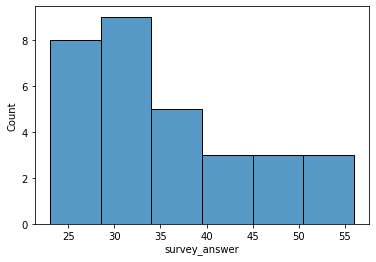

In [14]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-1.0")].survey_answer.astype(int, errors="ignore")
sns.histplot(ages)

In [15]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree               18
Master's degree                  7
Some college                     4
Did not complete high school     2
Name: survey_answer, dtype: int64

In [16]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    31
Name: survey_answer, dtype: int64

### Comments

In [17]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-1.0")].survey_answer)

['nothing',
 'no',
 'INTERESTING',
 'its an awesome study',
 'good',
 'IT IS EASY TO UNDERSTAND THANK YOU TEAM',
 'nice',
 '',
 '',
 'GOOD',
 'great',
 '',
 'good',
 '',
 'Thanks!',
 'good',
 'Good',
 '',
 '',
 '',
 'good',
 'Interesting',
 'very interesting experiment',
 '',
 '',
 'nocomments',
 'like it',
 'none',
 'None',
 'Such a good.',
 '']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

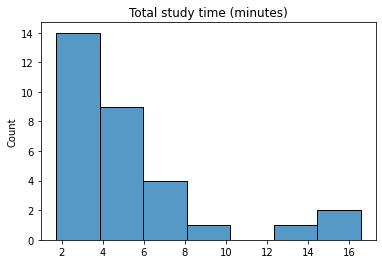

In [18]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [19]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.235496
std     3.760320
Name: rt, dtype: float64

### Response times

In [20]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

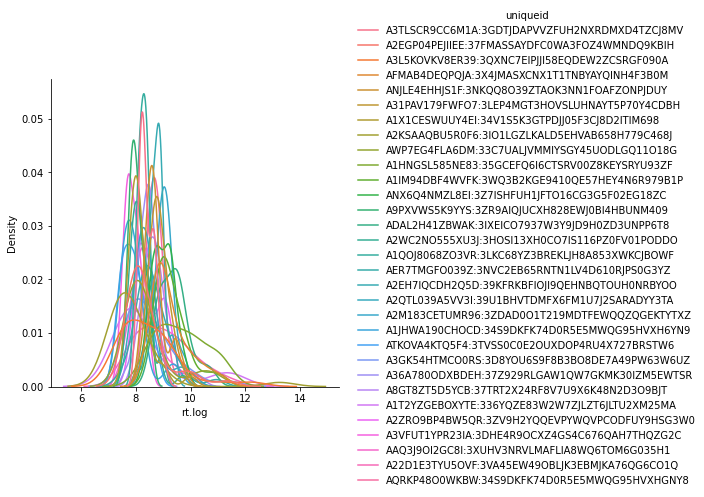

In [21]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [22]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

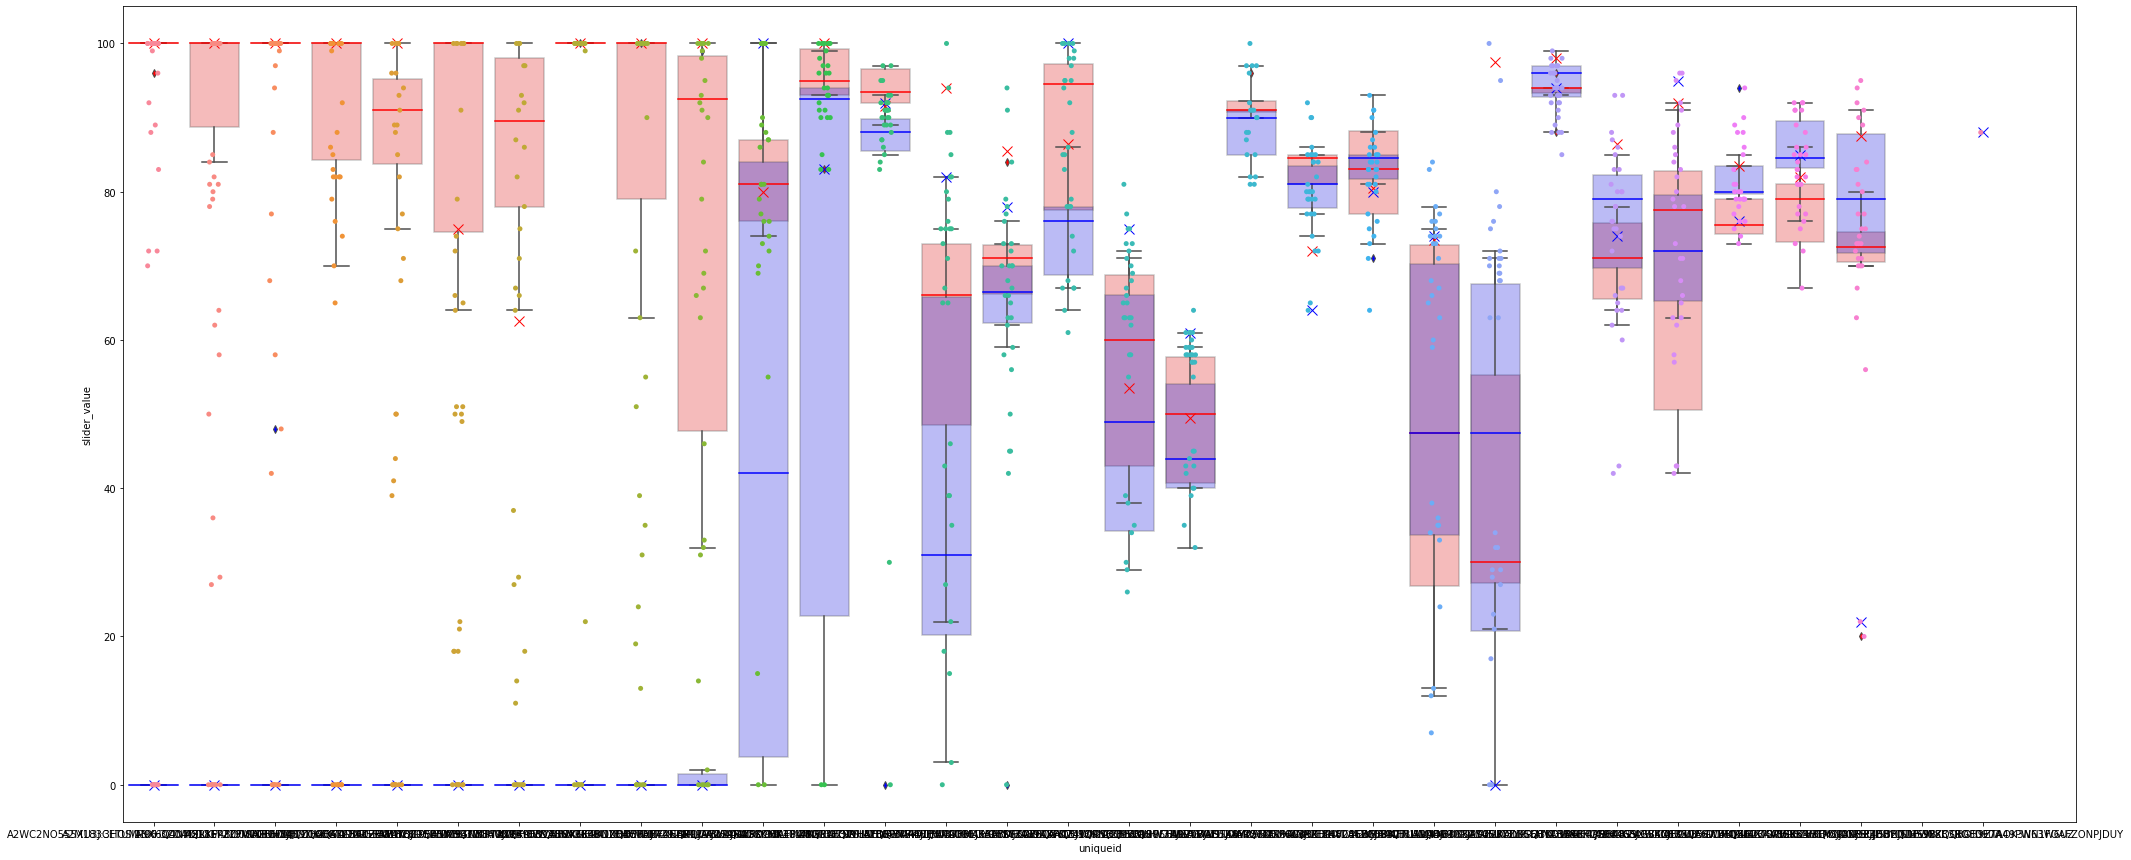

In [23]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [24]:
slider_practice_df = response_df[response_df.condition_0 == "practice"]
slider_practice_df["match"] = slider_practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
slider_practice_df["practice_id"] = slider_practice_df.condition_1.str.cat(slider_practice_df.condition_2)

<ipython-input-24-648c25b618b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slider_practice_df["match"] = slider_practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
<ipython-input-24-648c25b618b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slider_practice_df["practice_id"] = slider_practice_df.condition_1.str.cat(slider_practice_df.condition_2)


In [25]:
image_practice_df = image_response_df[image_response_df.condition_0 == "practice"]
image_practice_df["match"] = image_practice_df.apply(lambda r: r.response == "max" if r.condition_2 == "full" else r.response == "min", axis=1)
image_practice_df["practice_id"] = image_practice_df.condition_1.str.cat(image_practice_df.condition_2)

<ipython-input-25-1d9e1c3e2f15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_practice_df["match"] = image_practice_df.apply(lambda r: r.response == "max" if r.condition_2 == "full" else r.response == "min", axis=1)
<ipython-input-25-1d9e1c3e2f15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_practice_df["practice_id"] = image_practice_df.condition_1.str.cat(image_practice_df.condition_2)


In [26]:
practice_df = pd.concat([slider_practice_df, image_practice_df], axis=0)

In [27]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = set()

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [28]:
practice_df.groupby(["trial_index", "practice_id"]).match.mean()

trial_index  practice_id
4            fillfull       0.774194
5            fillfull       0.806452
6            coverempty     0.387097
7            fillempty      0.677419
8            coverfull      0.806452
Name: match, dtype: float64

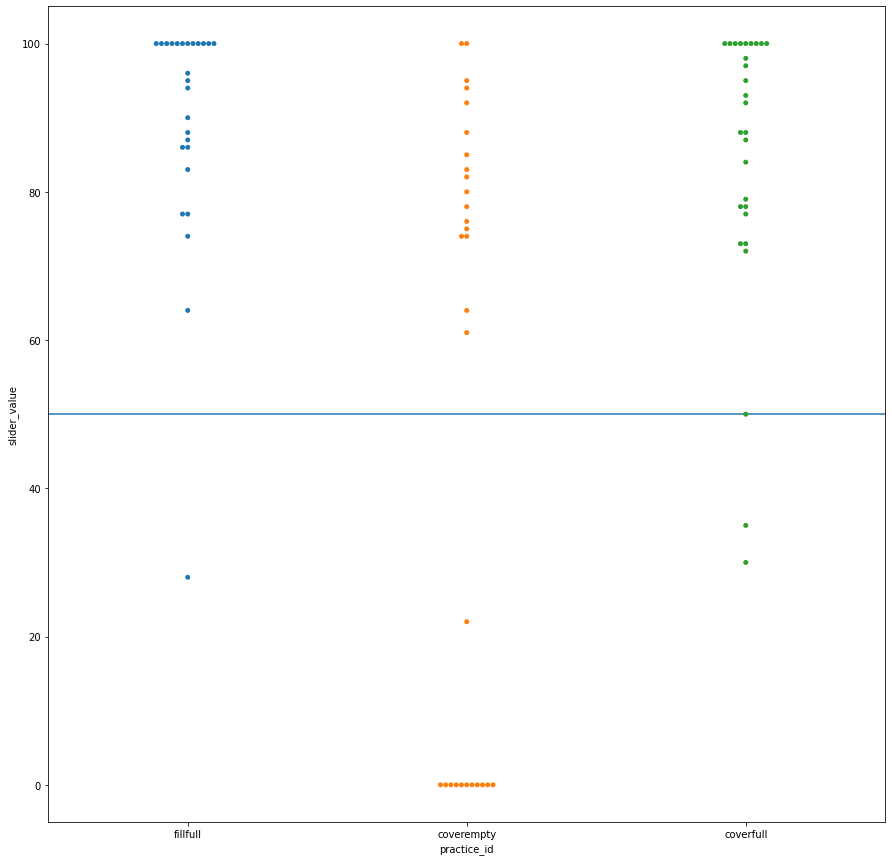

In [29]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=slider_practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [30]:
slider_practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
fillfull,0.161290,31
coverfull,0.096774,31
coverempty,0.064516,31


### Fillers

<AxesSubplot:xlabel='t'>

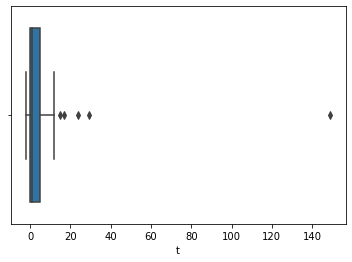

In [31]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [32]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A1X1CESWUUY4EI:34V1S5K3GTPDJJ05F3CJ8D2ITIM698,-2.123677,5.965316e-02
A1HNGSL585NE83:35GCEFQ6I6CTSRV00Z8KEYSRYU93ZF,-1.660861,1.353196e-01
A3L5KOVKV8ER39:3QXNC7EIPJJI58EQDEW2ZCSRGF090A,-1.503816,1.635371e-01
A3VFUT1YPR23IA:3DHE4R9OCXZ4GS4C676QAH7THQZG2C,-1.101929,2.963068e-01
A1QOJ8068ZO3VR:3LKC68YZ3BREKLJH8A853XWKCJBOWF,-0.755796,4.672016e-01
ATKOVA4KTQ5F4:3TVSS0C0E2OUXDOP4RU4X727BRSTW6,-0.507499,6.228093e-01
A2KSAAQBU5R0F6:3IO1LGZLKALD5EHVAB658H779C468J,-0.099709,9.225462e-01
AWP7EG4FLA6DM:33C7UALJVMMIYSGY45UODLGQ11O18G,-0.021751,9.830745e-01
AER7TMGFO039Z:3NVC2EB65RNTN1LV4D610RJPS0G3YZ,0.123445,9.042004e-01


#### Filler copouts

In [33]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
9.0,full,0.129032,4,31
0.0,empty,0.096774,3,31
2.0,empty,0.096774,3,31
4.0,empty,0.096774,3,31
11.0,full,0.096774,3,31
1.0,empty,0.064516,2,31
3.0,empty,0.064516,2,31
5.0,empty,0.064516,2,31
6.0,full,0.064516,2,31


#### Filler failures by item

In [34]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-34-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [35]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.516129
             1.0        0.419355
             2.0        0.451613
             3.0        0.354839
             4.0        0.387097
             5.0        0.483871
full         6.0        0.838710
             7.0        0.806452
             8.0        0.870968
             9.0        0.806452
             10.0       0.838710
             11.0       0.741935
Name: match, dtype: float64

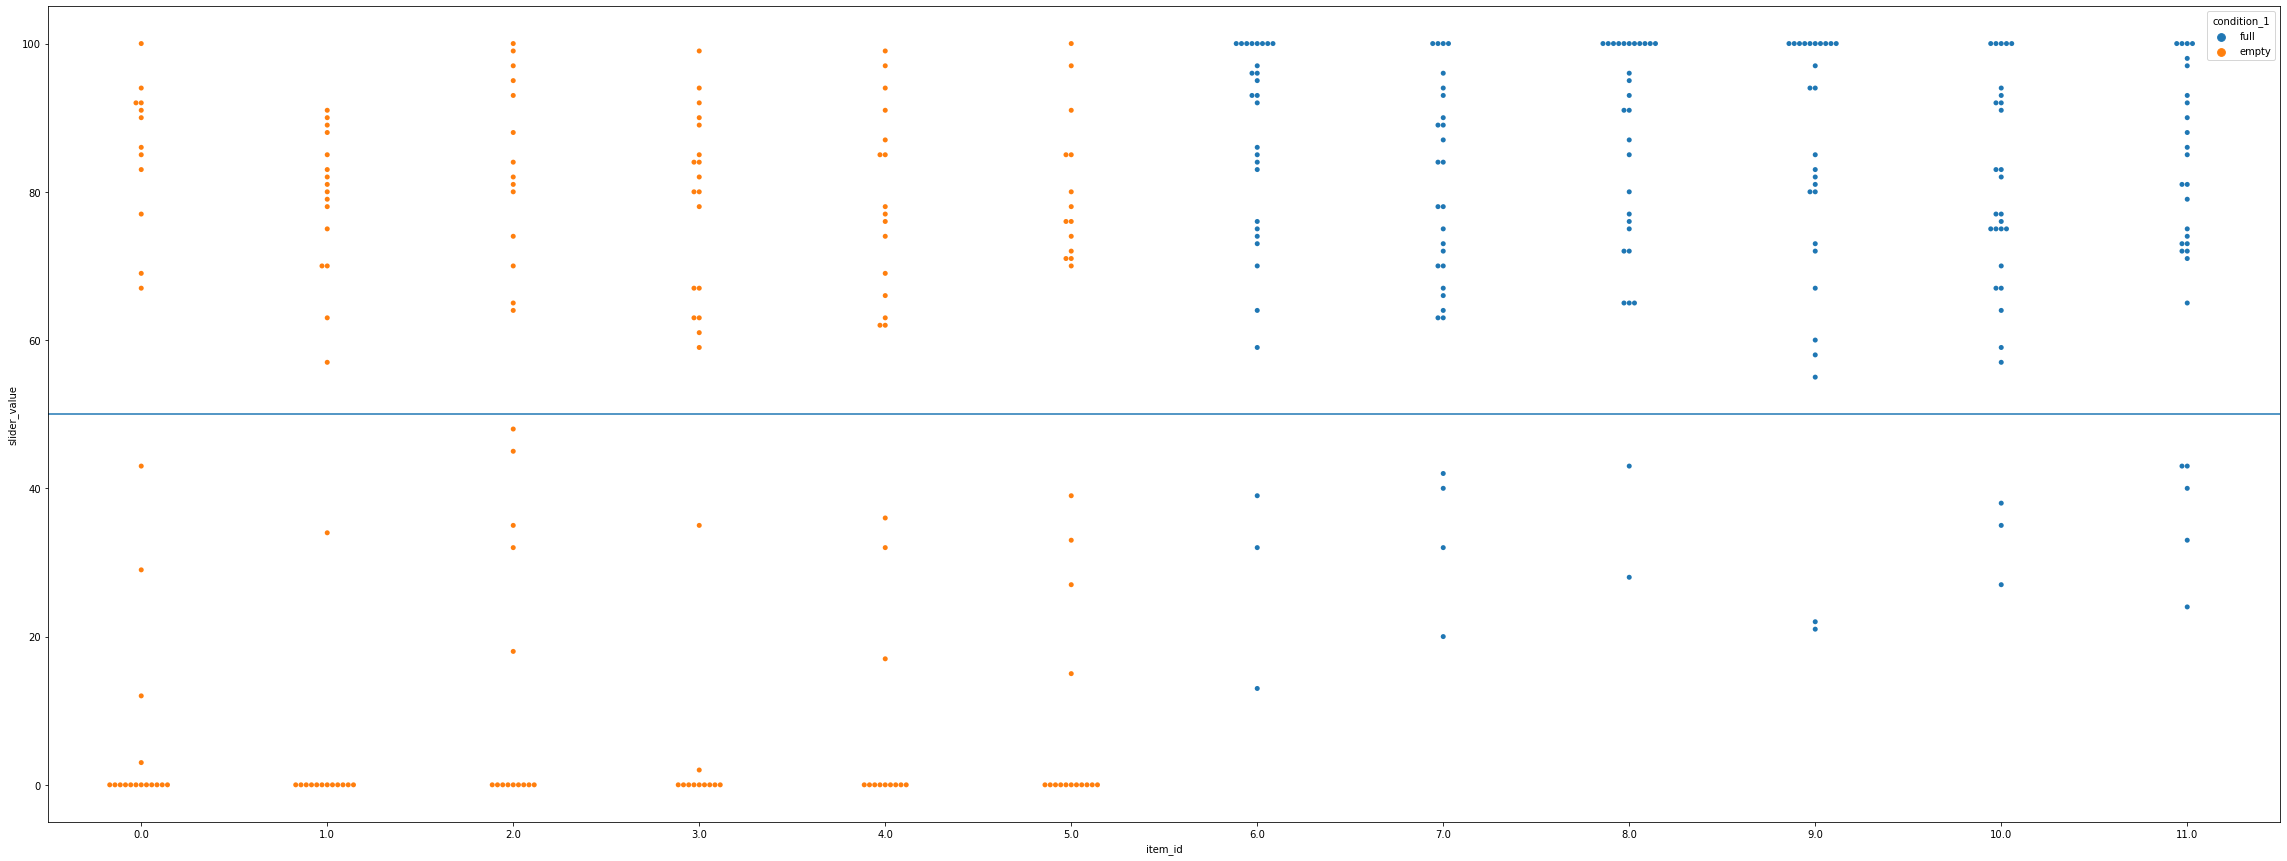

In [36]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [37]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]
exp_image_items = image_response_df[~(image_response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [38]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")
exp_image_items = exp_image_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")
exp_image_items = exp_image_items.drop(attention_drops.index, level="uniqueid")

12 subjects (38.7%) disqualified and dropped due to failed practice.
	ATKOVA4KTQ5F4:3TVSS0C0E2OUXDOP4RU4X727BRSTW6
	A3VFUT1YPR23IA:3DHE4R9OCXZ4GS4C676QAH7THQZG2C
	A1JHWA190CHOCD:34S9DKFK74D0R5E5MWQG95HVXH6YN9
	A1QOJ8068ZO3VR:3LKC68YZ3BREKLJH8A853XWKCJBOWF
	A3GK54HTMCO0RS:3D8YOU6S9F8B3BO8DE7A49PW63W6UZ
	AWP7EG4FLA6DM:33C7UALJVMMIYSGY45UODLGQ11O18G
	ANJLE4EHHJS1F:3NKQQ8O39ZTAOK3NN1FOAFZONPJDUY
	A1T2YZGEBOXYTE:336YQZE83W2W7ZJLZT6JLTU2XM25MA
	AAQ3J9OI2GC8I:3XUHV3NRVLMAFLIA8WQ6TOM6G035H1
	A1HNGSL585NE83:35GCEFQ6I6CTSRV00Z8KEYSRYU93ZF
	A9PXVWS5K9YYS:3ZR9AIQJUCXH828EWJ0BI4HBUNM409
	A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV
20 subjects (64.5%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A1HNGSL585NE83:35GCEFQ6I6CTSRV00Z8KEYSRYU93ZF
	A1QOJ8068ZO3VR:3LKC68YZ3BREKLJH8A853XWKCJBOWF
	A1T2YZGEBOXYTE:336YQZE83W2W7ZJLZT6JLTU2XM25MA
	A1X1CESWUUY4EI:34V1S5K3GTPDJJ05F3CJ8D2ITIM698
	A22D1E3TYU5OVF:3VA45EW49OBLJK3EBMJKA76QG6CO1Q
	A2EGP04PEJIIEE:37FMASSA

In [39]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

10 subjects remaining.


### Merge in materials

In [40]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["item_key"] = materials_df.V.str.cat(materials_df["T"], sep=" ")

# NB this doesn't handle fillers correctly

In [41]:
keep_cols = ["item_key", "T", "T heavy", "L", "L heavy", "V", "V pres", "scale type", "T plural?", "T mass?", "L plural?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)
merged_image_df = pd.merge(exp_image_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

#### Add frequency data

In [42]:
freqs = {}
with open("../../data/wikitext-2_train_vocab.txt") as f:
    for line in f:
        if line.strip():
            token, freq = line.strip().split("\t")
            freqs[token.strip()] = int(freq)

In [43]:
merged_df["V freq"] = merged_df["V pres"].map(freqs)

### Filter out items which were dropped in later materials iterations

In [44]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, spray-load-003-images.


### Export

In [45]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [46]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - theme_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "item_key", "T mass?", "scale type"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

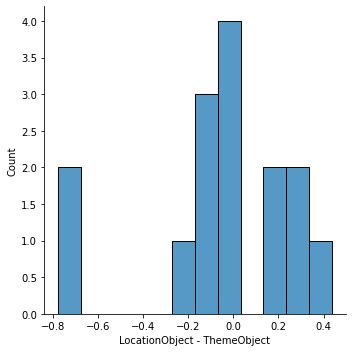

In [47]:
sns.displot(item_differences, bins=12)

In [48]:
item_differences.sort_values(ascending=False)

item_id  item_key                  T mass?  scale type
34.0     sprinkle nuts             False    cover         0.437145
12.0     load hay                  True     fill          0.290684
10.0     inject jelly              True     fill          0.244965
4.0      dab ointment              True     cover         0.234205
36.0     stack books               False    fill          0.145376
26.0     smear grease              True     cover         0.027589
41.0     stuff money               True     fill          0.007736
1.0      cram clothes              True     fill          0.003339
9.0      heap appetizers           False    cover        -0.033292
14.0     pack soil                 True     fill         -0.070023
25.0     slather mayonnaise        True     cover        -0.078374
32.0     spray paint               True     cover        -0.109849
16.0     plant lavender seedlings  False    cover        -0.267941
19.0     rub marinade              True     cover        -0.695416
35.0   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'squirt water'),
  Text(1, 0, 'rub marinade'),
  Text(2, 0, 'plant lavender seedlings'),
  Text(3, 0, 'spray paint'),
  Text(4, 0, 'slather mayonnaise'),
  Text(5, 0, 'pack soil'),
  Text(6, 0, 'heap appetizers'),
  Text(7, 0, 'cram clothes'),
  Text(8, 0, 'stuff money'),
  Text(9, 0, 'smear grease'),
  Text(10, 0, 'stack books'),
  Text(11, 0, 'dab ointment'),
  Text(12, 0, 'inject jelly'),
  Text(13, 0, 'load hay'),
  Text(14, 0, 'sprinkle nuts')])

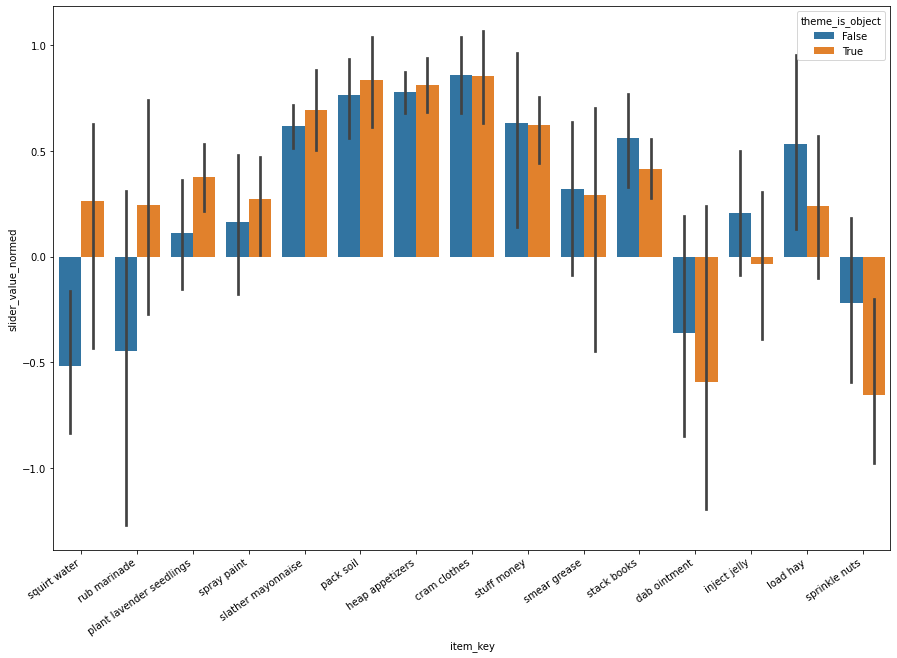

In [49]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="item_key", hue="theme_is_object", y="slider_value_normed",
            order=item_differences.sort_values().index.get_level_values("item_key"))
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='T mass?', ylabel='LocationObject - ThemeObject'>

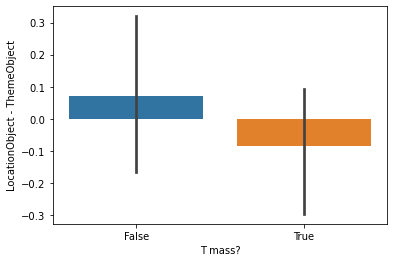

In [50]:
sns.barplot(data=item_differences.reset_index(), x="T mass?", y="LocationObject - ThemeObject")

### By scale type

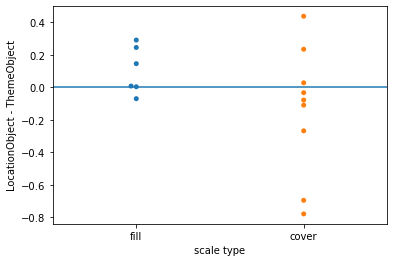

In [51]:
ax = sns.swarmplot(data=item_differences.reset_index(), x="scale type", y="LocationObject - ThemeObject")
ax.axhline(0)

### Bootstrap check

In [52]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

# item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
# item_bootstrap_df

In [53]:
# item_bootstrap_df = \
#     pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
#              left_index=True, right_index=True).sort_values("low", ascending=False)

In [54]:
# item_bootstrap_df.sort_values("low", ascending=False)

In [55]:
# plt.subplots(figsize=(15, 15))
# sns.barplot(
#     data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
#     x="AV", y="value", hue="variable")
# plt.xticks(rotation=35, ha="right")

### Copouts

In [56]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [57]:
copouts = merged_df.groupby(["materials_id", "item_id", "theme_is_object"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "theme_is_object"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout            sum  count  mean
item_id theme_is_object                  
1.0     False              0      4   0.0
        True               0      6   0.0
41.0    False              0      3   0.0
36.0    True               0      4   0.0
        False              0      6   0.0
35.0    True               0      3   0.0
        False              0      7   0.0
34.0    True               0      4   0.0
        False              0      6   0.0
32.0    True               0      3   0.0
        False              0      7   0.0
26.0    True               0      4   0.0
        False              0      6   0.0
25.0    True               0      5   0.0
        False              0      5   0.0
19.0    True               0      6   0.0
        False              0      4   0.0
16.0    True               0      3   0.0
        False              0      7   0.0
14.0    True               0      4   0.0
        False              0      6   0.0
12.0    True               0      4   0.0
        False              0      6   0.0
10.0    True               0      6   0.0
        False              0      4   0.0
9.0     True               0      6   0.0
        False              0      4   0.0
4.0     True               0      4   0.0
        False              0      6   0.0
41.0    True               0      7   0.0

<AxesSubplot:xlabel='item_key', ylabel='slider_copout'>

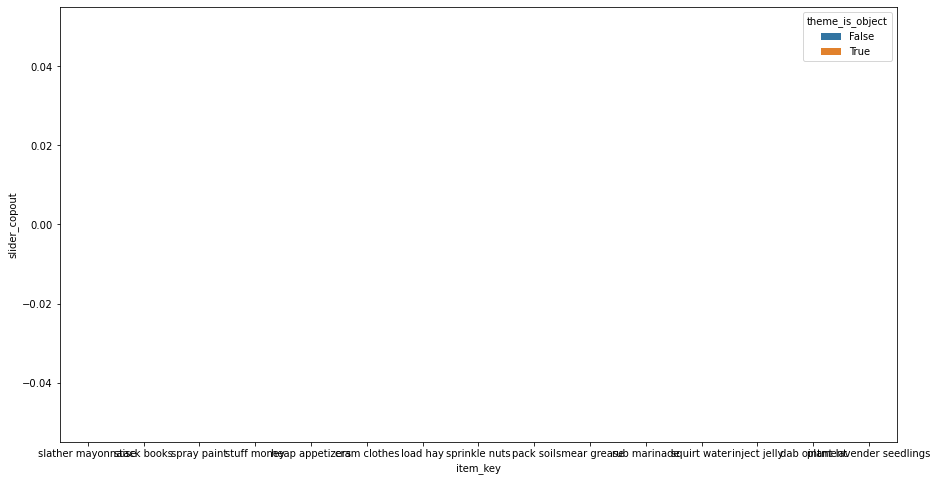

In [58]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="item_key", y="slider_copout", hue="theme_is_object")

<AxesSubplot:xlabel='T mass?', ylabel='slider_copout'>

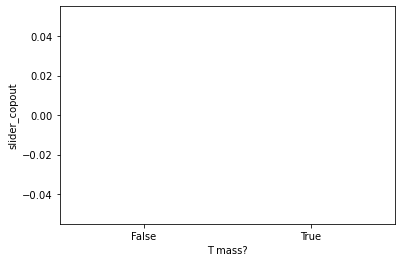

In [59]:
sns.barplot(data=merged_df, x="T mass?", y="slider_copout")

## Basic analysis: image trials

In [60]:
merged_image_df[["theme_is_object", "response"]]

theme_is_object  \
trial_index uniqueid                                                         
14          A1IM94DBF4WVFK:3WQ3B2KGE9410QE57HEY4N6R979B1P            False   
            ANX6Q4NMZL8EI:3Z7ISHFUH1JFTO16CG3G5F02EG18ZC              True   
17          ADAL2H41ZBWAK:3IXEICO7937W3Y9JD9H0ZD3UNPP6T8              True   
40          A2WC2NO555XU3J:3HOSI13XH0CO7IS116PZ0FV01PODDO            False   
16          A2EH7IQCDH2Q5D:39KFRKBFIOJI9QEHNBQTOUH0NRBYOO            False   
14          A2QTL039A5VV3I:39U1BHVTDMFX6FM1U7J2SARADYY3TA             True   
24          A2M183CETUMR96:3ZDAD0O1T219MDTFEWQQZQGEKTYTXZ             True   
16          A36A780ODXBDEH:37Z929RLGAW1QW7GKMK30IZM5EWTSR             True   
28          A8GT8ZT5D5YCB:37TRT2X24RF8V7U9X6K48N2D3O9BJT             False   
32          AQRKP48O0WKBW:34S9DKFK74D0R5E5MWQG95HVXHGNY8             False   
16          A1IM94DBF4WVFK:3WQ3B2KGE9410QE57HEY4N6R979B1P             True   
37          ANX6Q4NMZL8EI:3Z7ISHFUH1JFTO16CG3G5F02EG18ZC             False   
29          ADAL2H41ZBWAK:3IXEICO7937W3Y9JD9H0ZD3UNPP6T8              True   
16          A2WC2NO555XU3J:3HOSI13XH0CO7IS116PZ0FV01PODDO            False   
40          A2EH7IQCDH2Q5D:39KFRKBFIOJI9QEHNBQTOUH0NRBYOO             True   
30          A2QTL039A5VV3I:39U1BHVTDMFX6FM1U7J2SARADYY3TA            False   
17          A2M183CETUMR96:3ZDAD0O1T219MDTFEWQQZQGEKTYTXZ            False   
26          A36A780ODXBDEH:37Z929RLGAW1QW7GKMK30IZM5EWTSR            False   
30          A8GT8ZT5D5YCB:37TRT2X24RF8V7U9X6K48N2D3O9BJT              True   
29          AQRKP48O0WKBW:34S9DKFK74D0R5E5MWQG95HVXHGNY8             False   
23          A1IM94DBF4WVFK:3WQ3B2KGE9410QE57HEY4N6R979B1P             True   
29          ANX6Q4NMZL8EI:3Z7ISHFUH1JFTO16CG3G5F02EG18ZC              True   
27          ADAL2H41ZBWAK:3IXEICO7937W3Y9JD9H0ZD3UNPP6T8             False   
18          A2WC2NO555XU3J:3HOSI13XH0CO7IS116PZ0FV01PODDO             True   
27          A2EH7IQCDH2Q5D:39KFRKBFIOJI9QEHNBQTOUH0NRBYOO             True   
39          A2QTL039A5VV3I:39U1BHVTDMFX6FM1U7J2SARADYY3TA             True   
36          A2M183CETUMR96:3ZDAD0O1T219MDTFEWQQZQGEKTYTXZ            False   
39          A36A780ODXBDEH:37Z929RLGAW1QW7GKMK30IZM5EWTSR             True   
15          A8GT8ZT5D5YCB:37TRT2X24RF8V7U9X6K48N2D3O9BJT              True   
16          AQRKP48O0WKBW:34S9DKFK74D0R5E5MWQG95HVXHGNY8             False   
34          A1IM94DBF4WVFK:3WQ3B2KGE9410QE57HEY4N6R979B1P            False   
30          ANX6Q4NMZL8EI:3Z7ISHFUH1JFTO16CG3G5F02EG18ZC              True   
20          ADAL2H41ZBWAK:3IXEICO7937W3Y9JD9H0ZD3UNPP6T8              True   
13          A2WC2NO555XU3J:3HOSI13XH0CO7IS116PZ0FV01PODDO            False   
34          A2EH7IQCDH2Q5D:39KFRKBFIOJI9QEHNBQTOUH0NRBYOO             True   
17          A2QTL039A5VV3I:39U1BHVTDMFX6FM1U7J2SARADYY3TA             True   
10          A2M183CETUMR96:3ZDAD0O1T219MDTFEWQQZQGEKTYTXZ            False   
11          A36A780ODXBDEH:37Z929RLGAW1QW7GKMK30IZM5EWTSR             True   
19          A8GT8ZT5D5YCB:37TRT2X24RF8V7U9X6K48N2D3O9BJT             False   
22          AQRKP48O0WKBW:34S9DKFK74D0R5E5MWQG95HVXHGNY8             False   
38          A1IM94DBF4WVFK:3WQ3B2KGE9410QE57HEY4N6R979B1P             True   
18          ANX6Q4NMZL8EI:3Z7ISHFUH1JFTO16CG3G5F02EG18ZC              True   
38          ADAL2H41ZBWAK:3IXEICO7937W3Y9JD9H0ZD3UNPP6T8             False   
41          A2WC2NO555XU3J:3HOSI13XH0CO7IS116PZ0FV01PODDO             True   
10          A2EH7IQCDH2Q5D:39KFRKBFIOJI9QEHNBQTOUH0NRBYOO             True   
31          A2QTL039A5VV3I:39U1BHVTDMFX6FM1U7J2SARADYY3TA             True   
16          A2M183CETUMR96:3ZDAD0O1T219MDTFEWQQZQGEKTYTXZ             True   
10          A36A780ODXBDEH:37Z929RLGAW1QW7GKMK30IZM5EWTSR             True   
31          A8GT8ZT5D5YCB:37TRT2X24RF8V7U9X6K48N2D3O9BJT              True   
28          AQRKP48O0WKBW:34S9DKFK74D0R5E5MWQG95HVXHGNY8              True   

  

<AxesSubplot:xlabel='theme_is_object', ylabel='chose_max'>

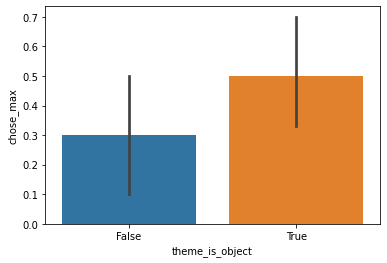

In [61]:
merged_image_df["chose_max"] = merged_image_df["response"] == "max"
sns.barplot(data=merged_image_df.reset_index(), x="theme_is_object", y="chose_max")

<AxesSubplot:xlabel='item_key', ylabel='chose_max'>

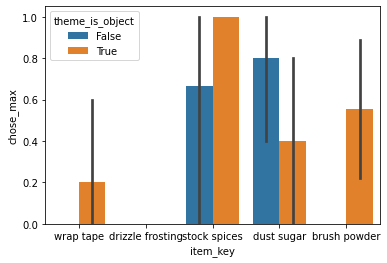

In [62]:
sns.barplot(data=merged_image_df.reset_index(), x="item_key", hue="theme_is_object", y="chose_max")

In [65]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.chose_max.mean() - theme_rows.chose_max.mean()

image_item_differences = merged_image_df.groupby(["item_id", "item_key", "T mass?", "scale type"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

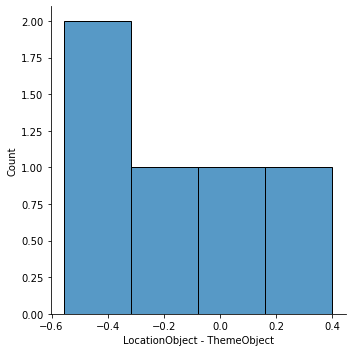

In [67]:
sns.displot(image_item_differences)

In [68]:
image_item_differences.sort_values()

item_id  item_key          T mass?  scale type
0.0      brush powder      True     cover        -0.555556
38.0     stock spices      False    fill         -0.333333
43.0     wrap tape         True     cover        -0.200000
6.0      drizzle frosting  True     cover         0.000000
7.0      dust sugar        True     cover         0.400000
Name: LocationObject - ThemeObject, dtype: float64

## Item exposure

In [63]:
merged_df.groupby(["item_id", "item_key", "theme_is_object"]).size().sort_values().head(20)

item_id  item_key                  theme_is_object
35.0     squirt water              True               3
32.0     spray paint               True               3
41.0     stuff money               False              3
16.0     plant lavender seedlings  True               3
1.0      cram clothes              False              4
36.0     stack books               True               4
34.0     sprinkle nuts             True               4
26.0     smear grease              True               4
14.0     pack soil                 True               4
19.0     rub marinade              False              4
10.0     inject jelly              False              4
4.0      dab ointment              True               4
12.0     load hay                  True               4
9.0      heap appetizers           False              4
25.0     slather mayonnaise        False              5
                                   True               5
14.0     pack soil                 False             